# Hastings Direct Takehome

Background:
Insurance companies make pricing decisions based on historical claims experience. The more recent the claims experience, the more predictive it may be of future losses. In the case of many large claims however, the exact cost is not known at the time of the accident. In fact, some cases take years to develop and settle. Companies sometimes learn that a claim is large several years after the accident took place.
Your Underwriting Director believes it is possible to predict the ultimate value of individual claims well in advance by using FNOL (First Notification Of Loss) characteristics. This is the information recorded when the claim is first notified. If so, it would allow the company to know about future costs earlier and this information could be used to make better pricing decisions.
You are given a historical dataset of a particular type of claim - head-on collisions - and are also told their individual current estimated values (labelled Incurred). (Given these claims are now a few years old, you can assume the incurred values are equal to the cost at which the claims will finally settle). 

Task breakdown:
1) Using this data, build a model to predict the ultimate individual claim amounts
"2) Prepare a 15 minute presentation summarising your model. Your presentation should either be in notebook format or a more traditional slide deck.  If you opt for the slide deck approach, please make sure that you provide supporting code. 
Your presentation should cover the following aspects:
- Issues identified with the data and how these were addressed
- Data cleansing
- Model specification and justification for selecting this model specification
- Assessment of your model's accuracy and model diagnostics
- Suggestions of how your model could be improved
- Practical challenges for implementing your model"

Note: columns beginning with TP_* show the number of third parties involved in an accident (under a given category)

# Data Cleaning


* After import I had to strip tab delimiters and currency characters

<div style="max-width:500px;margin-right: auto; margin-right: 0;">
    
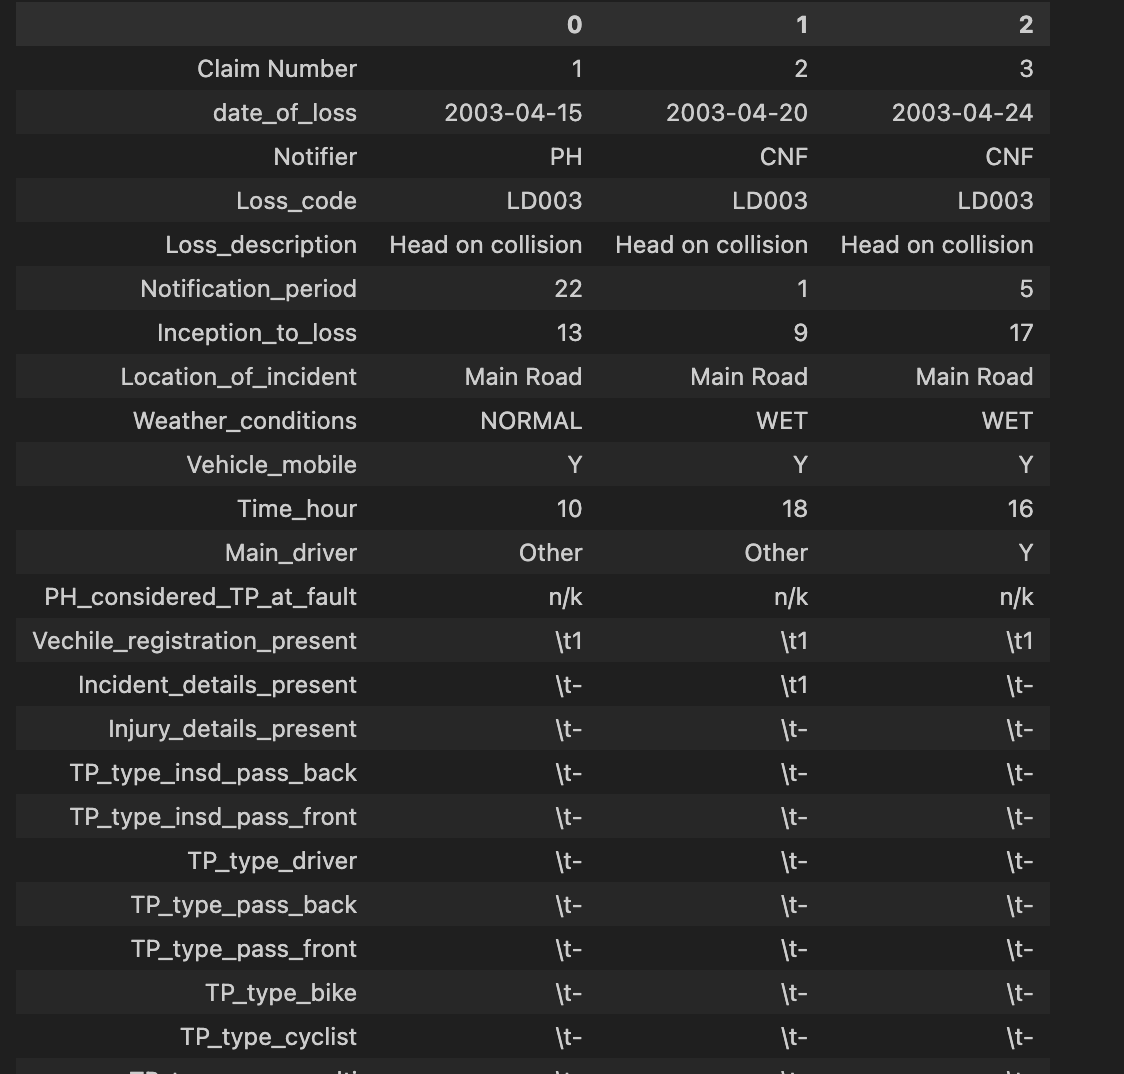
    
</div>






* I found some features constant so I dropped them

* Latest weather not reliable - did not fix but could have used external data joined on date. 

<div style="max-width:500px;margin-right: auto; margin-right: 0;">

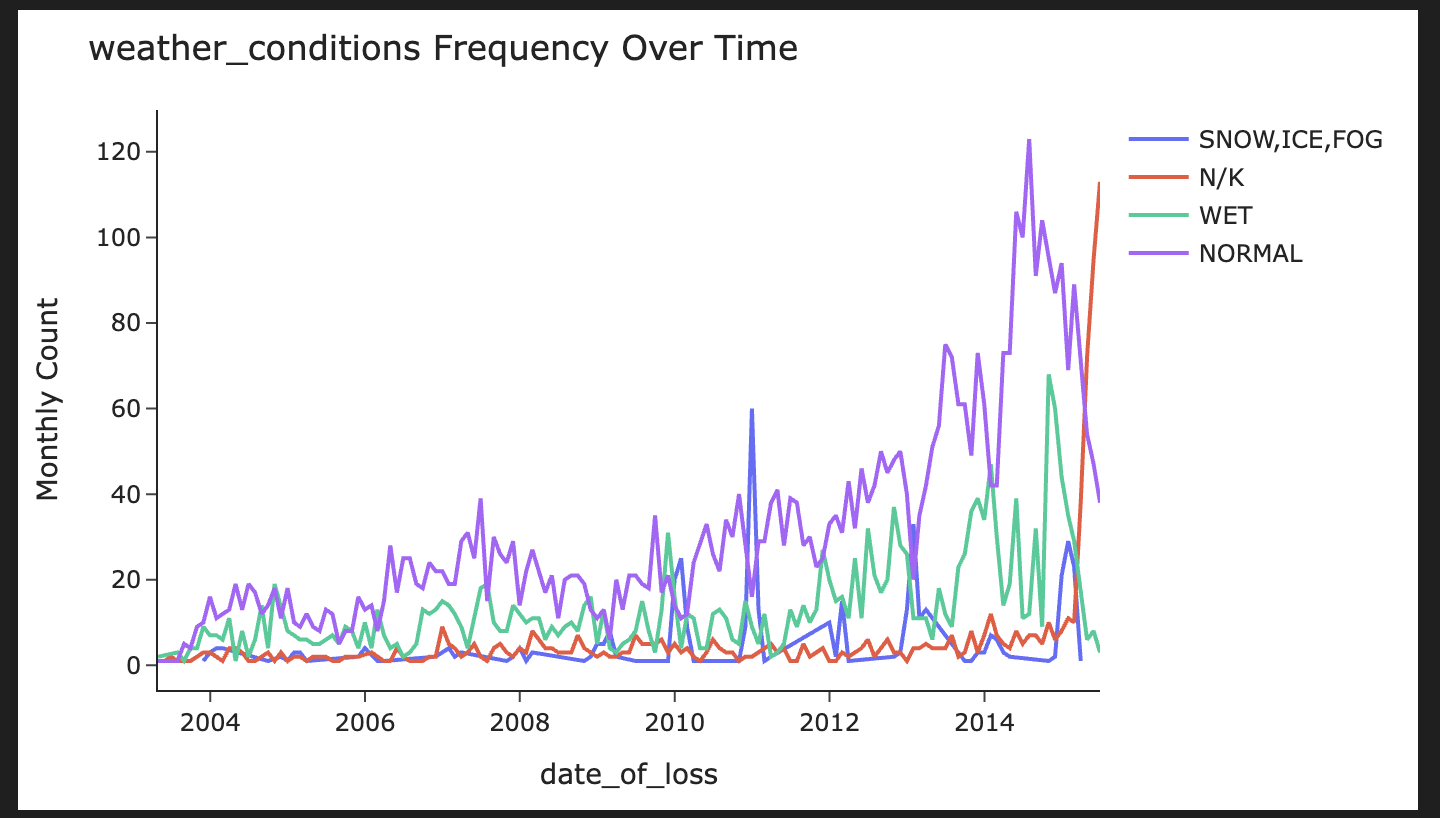

</div>

* Missing Targets I found they were consistently missing over time rather than clumped together

<div style="max-width:500px;margin-right: auto; margin-right: 0;">

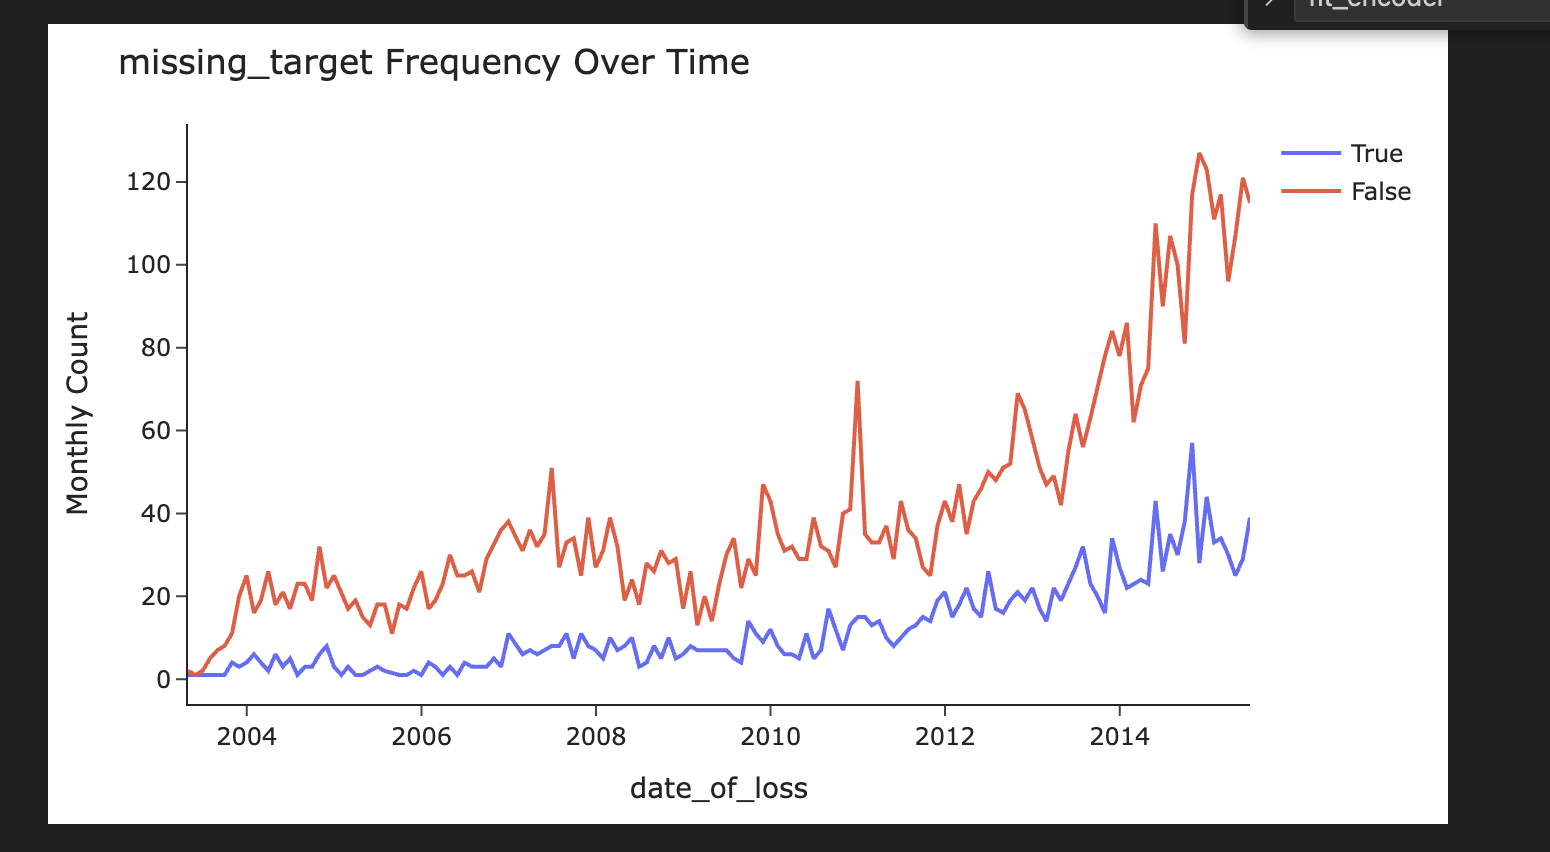

</div>

* I also added a vis to all my per column EDA to check if there was a noticeable relationship between missing target and predictors and didnt spot anything too worrying

<div style="max-width:500px;margin-right: auto; margin-right: 0;">

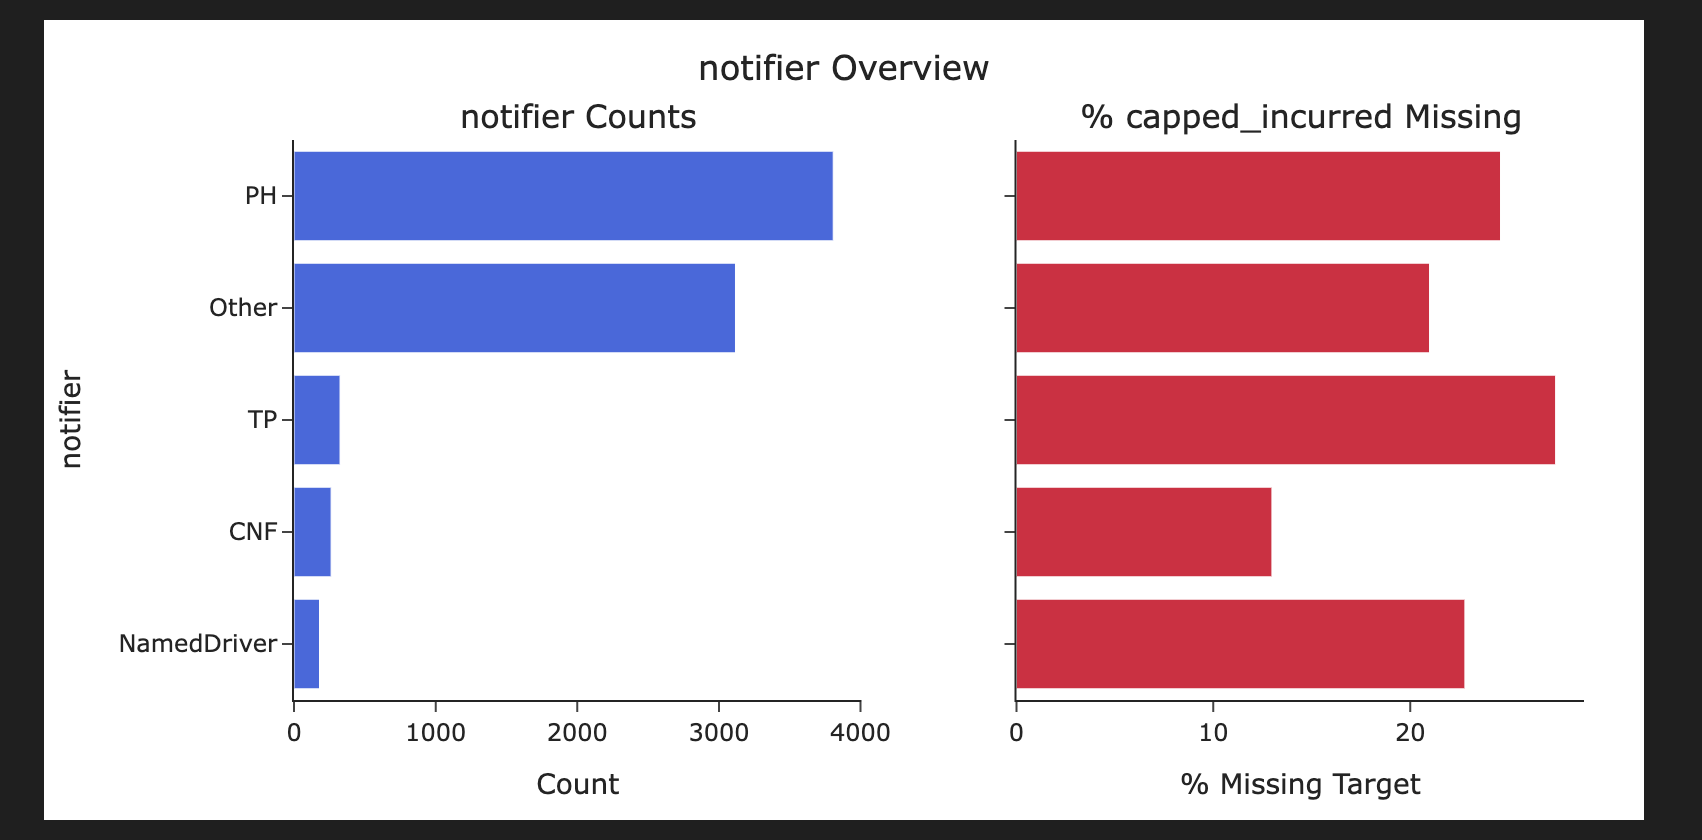

</div>

* Felt the sensible course was to drop these records from training set



* Outliers in targets - explored using logged features instead but ultimately found capped_incurred has best r2 without further transformations or different model spec.

<div style="max-width:500px;margin-right: auto; margin-right: 0;">

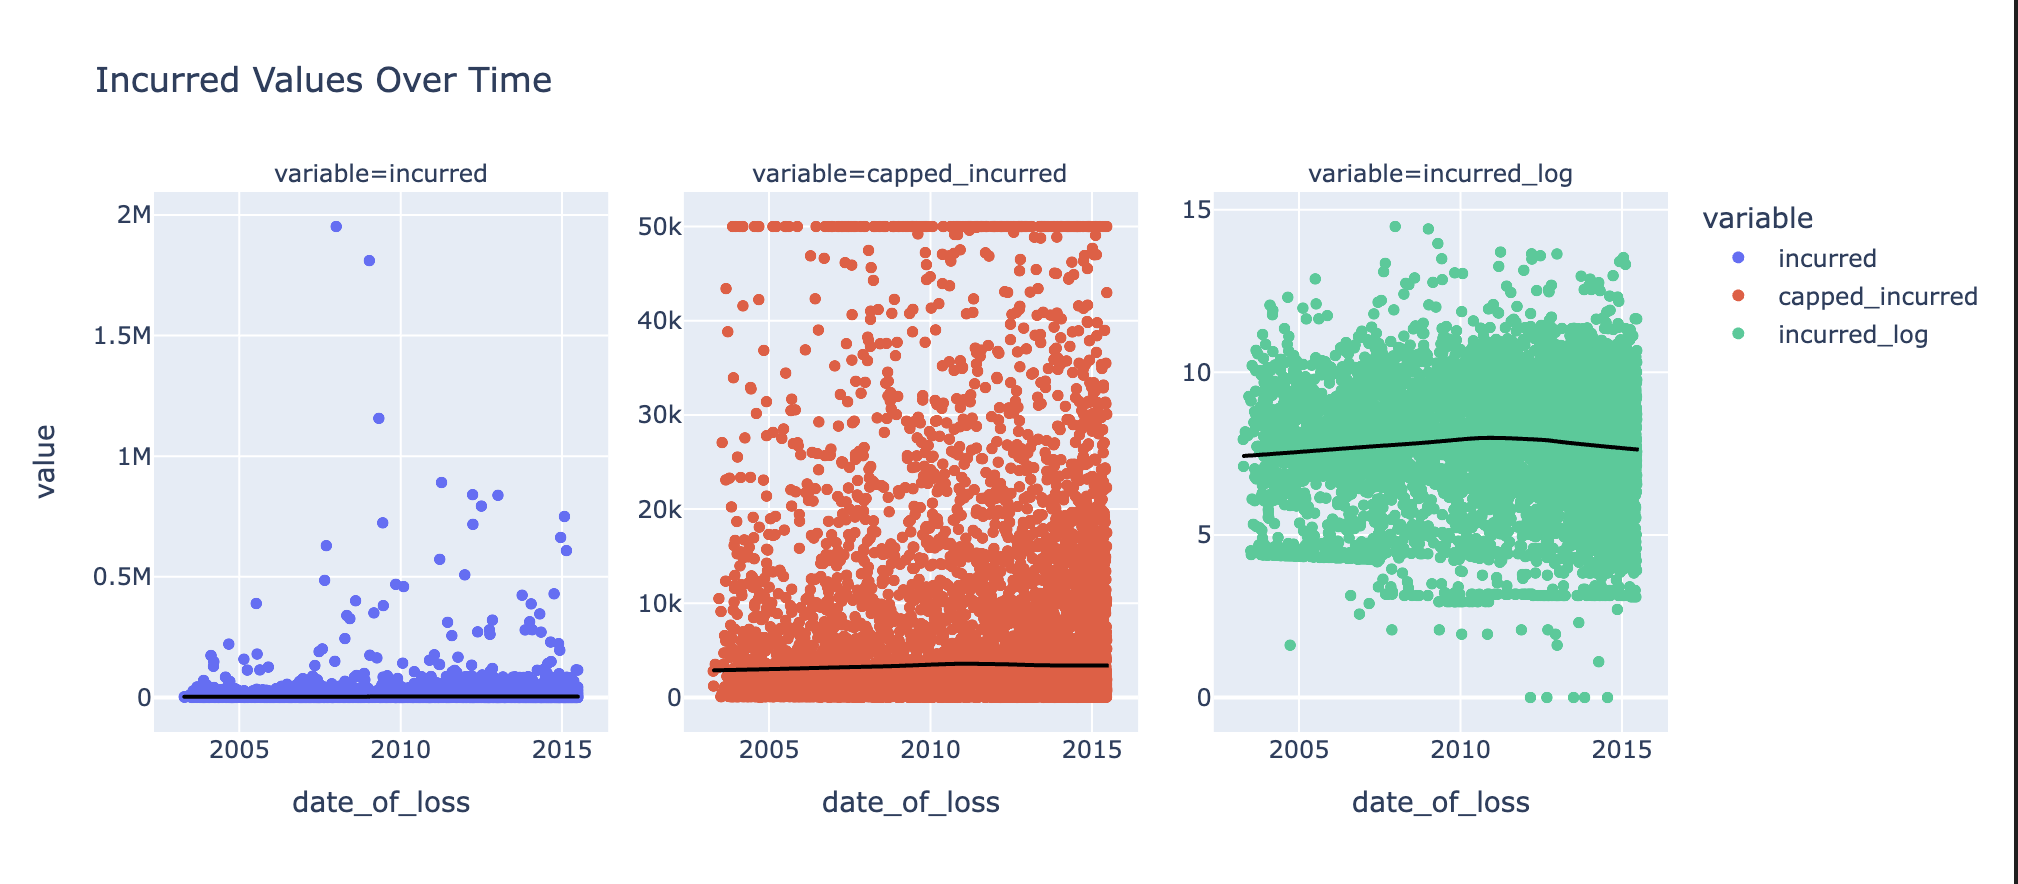

</div>

# Feature Engineering

* Time series decomposition showed some cyclical trends

<div style="max-width:500px;margin-right: auto; margin-right: 0;">

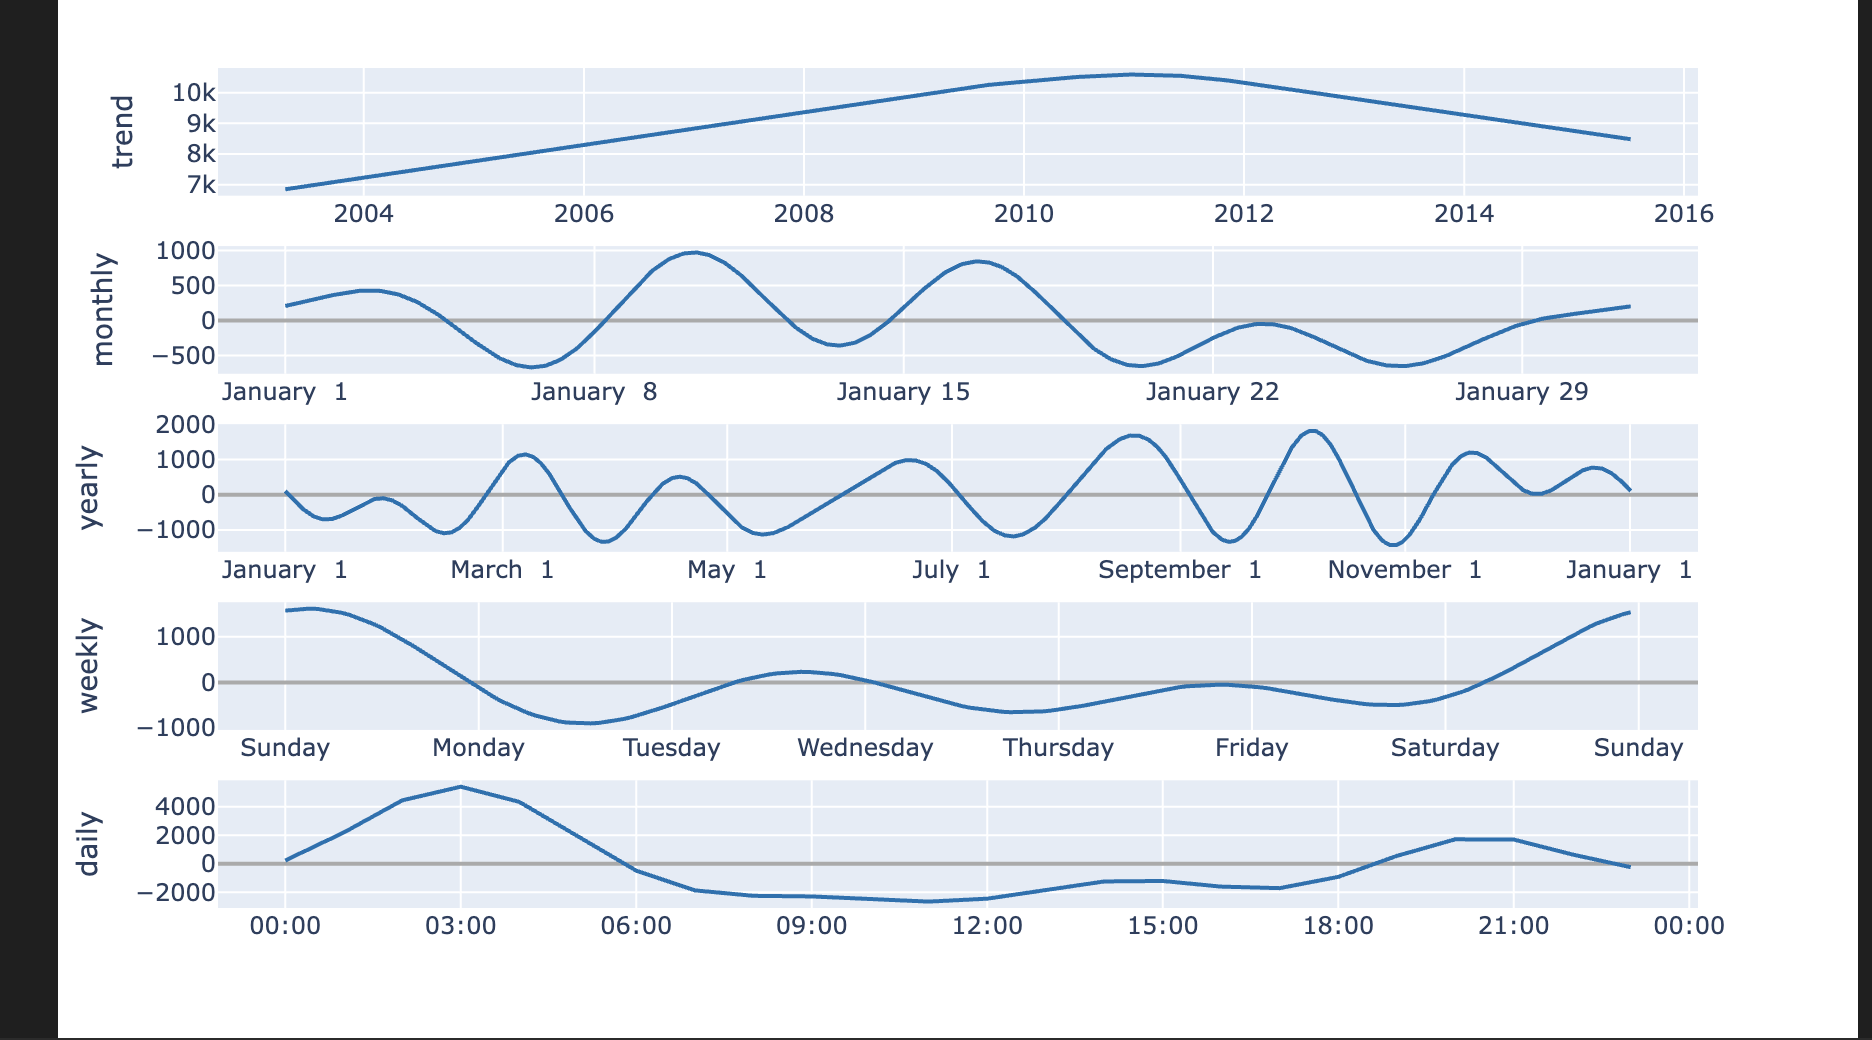

</div>

So I generated features that would allow models to capture cyclical element as well as buckets with indicator variables to allow the key part of the time/ date feature to be selected directly (e.g nighttime, commute hour, weekend)

<div style="max-width:500px;margin-right: auto; margin-right: 0;">

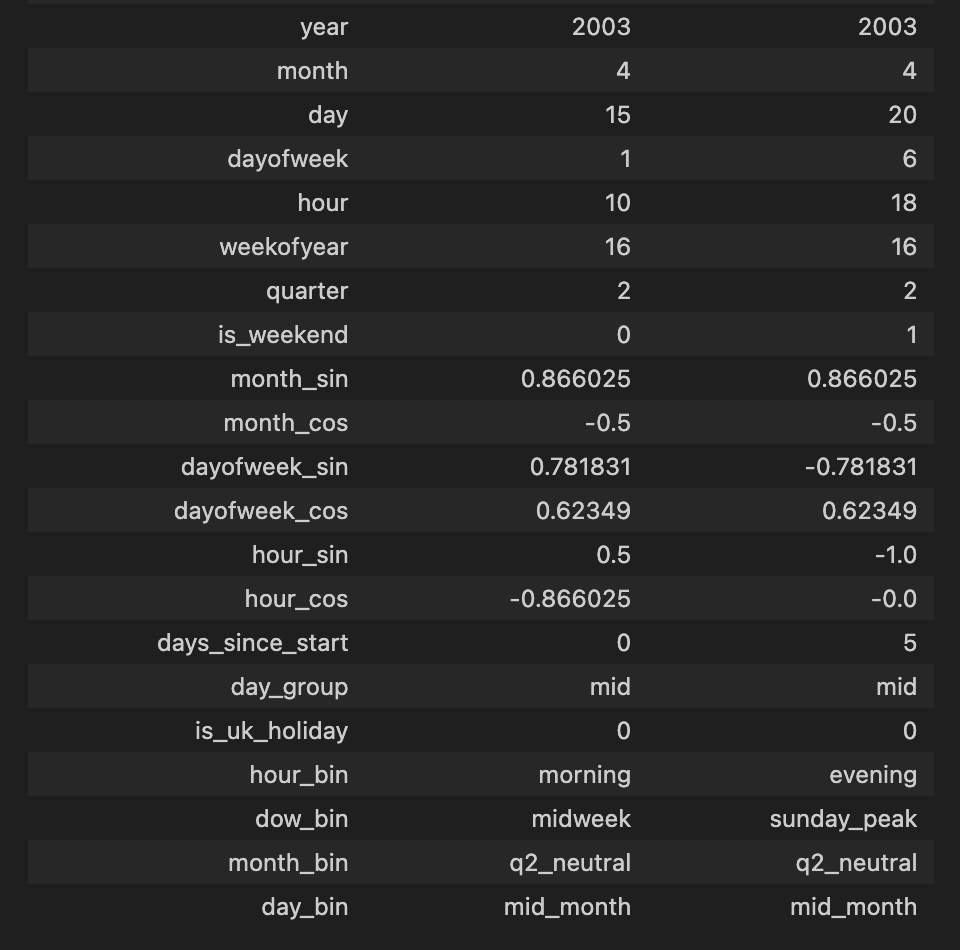

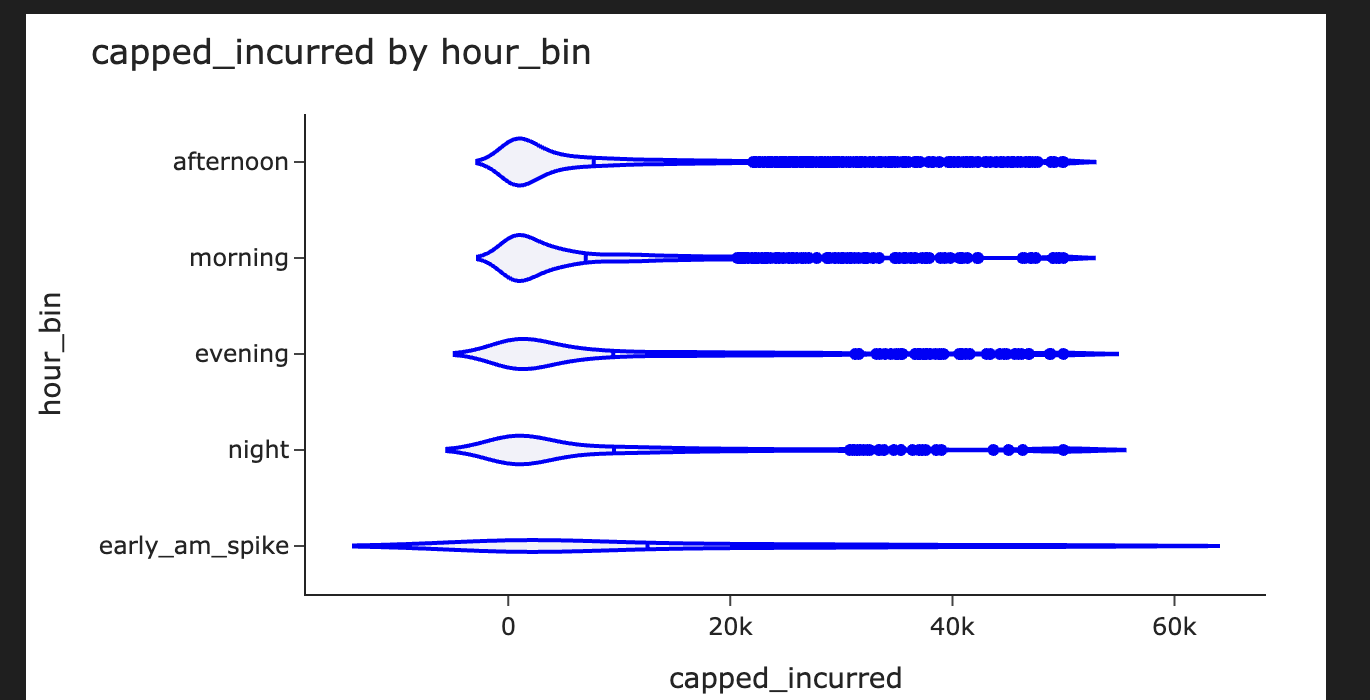

</div>

* Since there were lots of grouped count variables that model specs might not understand the relatiobship between I tried adding mean target encoding to summarise

<div style="max-width:300px;margin-right: auto; margin-right: 0;">

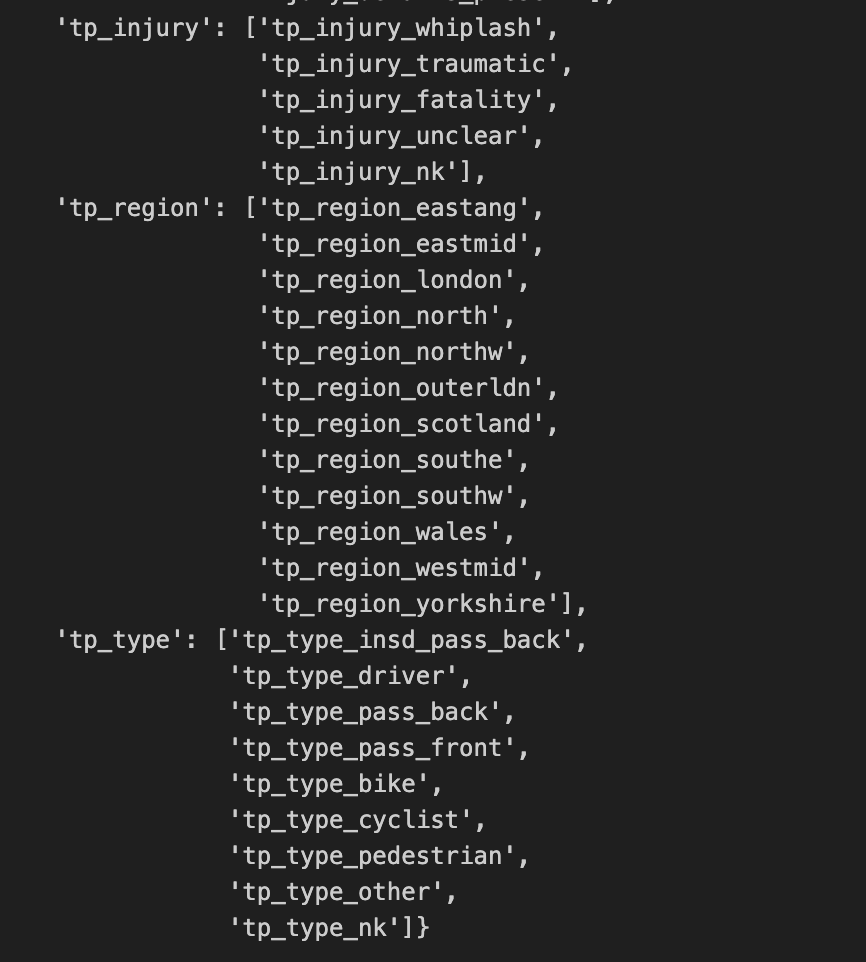

</div>

<div style="max-width:600px;margin-right: auto; margin-right: 0;">

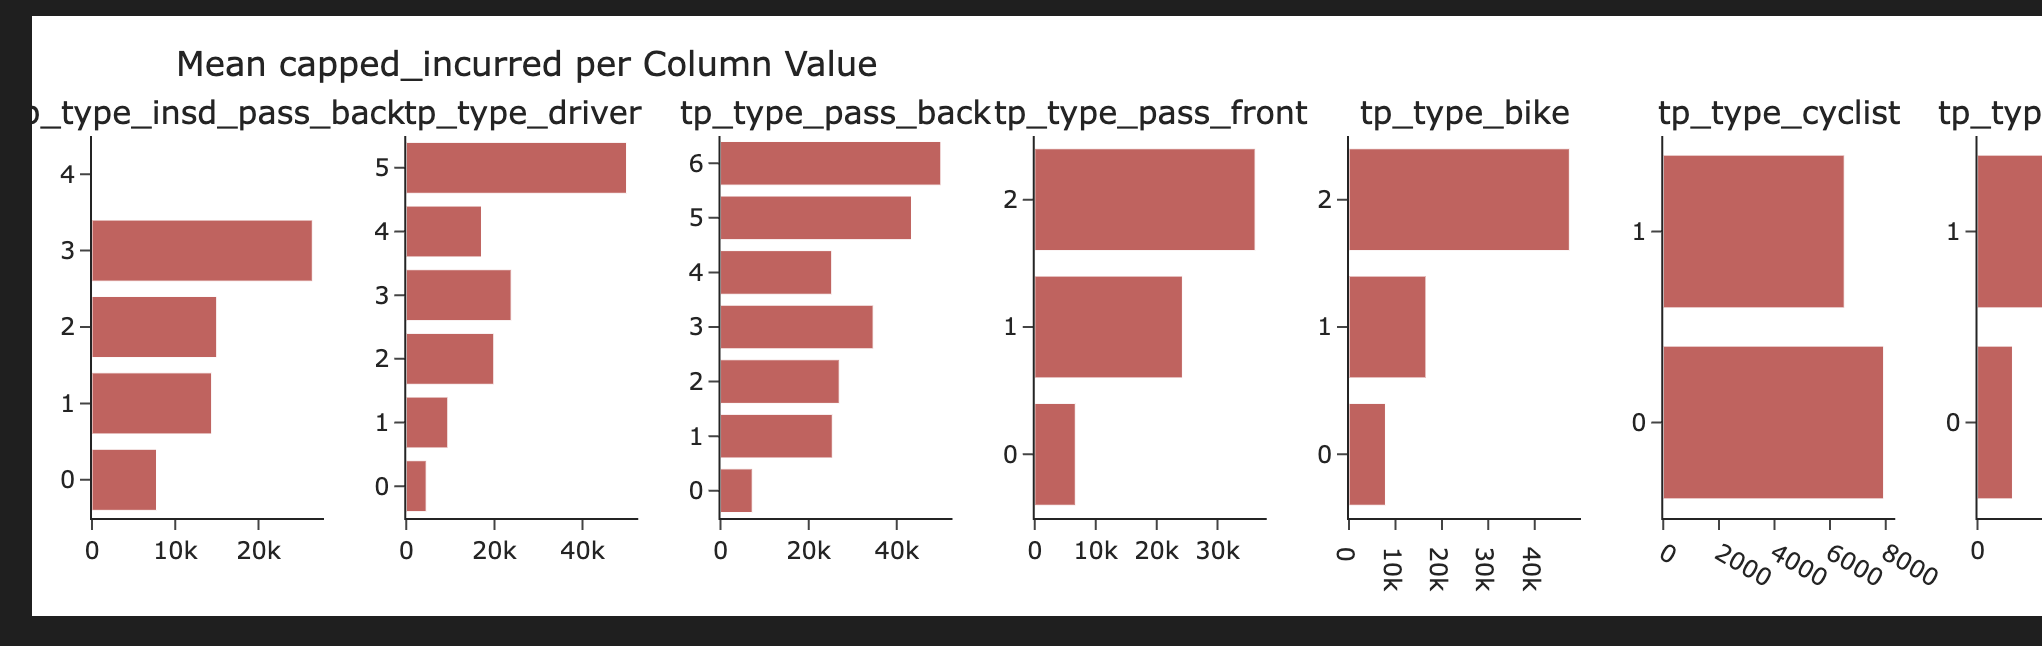

</div>

I generated both mean target encoded values for the individual count colunns and then also summed them to find a single total for the group as a whole if I wanted to incorporate the signal from the feature group without the excessive dimensionality

<div style="max-width:700px;margin-right: auto; margin-right: 0;">

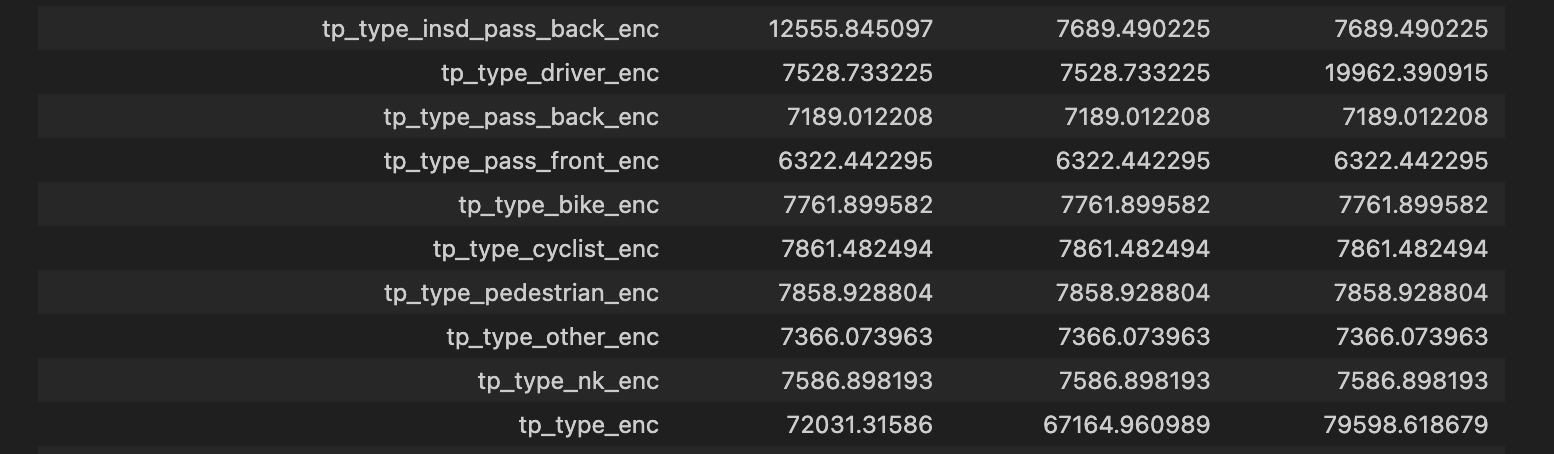

</div>



In [ ]:
# hastings

- Issues identified with the data and how these were addressed
- Data cleansing

* 



- Model specification and justification for selecting this model specification

* Approached as a continous prediction problem. Considered combining with high value binary flag and using different models to predict given whether its a high value predicted case or not
* Test train split done on date rather than random sampling to better assess chance to generalise to the future
* Produced two test train splits - one for full data in train up to 2014 to give 2014-2015Q1 to test on. This did mean not using a lot of the most recent best quality data so wasnt ideal but I wanted a full year of test data in case of seasonality being missed. The 2nd recent set was 2012-2014q3 leaving 2 most recent Qs to test on. This had better results and better coverage of some useful features
* Considered predictive accuracy above robust coefficient estimation. So used some boosting and bagging (rf and gbm) approaches as well as multiple regression. 
* GBM handle non-linear relationships, skew in target and predictor distributions, mixed data types, high levels of colinearity
* Extensive use of mean target encoding for categorical and multivariable counts although also compared predictive value of counts and dummy variables as appropriate
* All features were run as predictors for a simple linear model vs target in EDA and I prioritised those that had a visible relationship to target or a statistically significant coefficient.
* Ensemble trees were used to find hidden interactions efficiently. Hyper-parameter tuning was attempted but had little improvement over the feature selection. 
* Manual interaction terms were created based on terms that plausibly might interact. I opted for meant
* Applied stepwise regression with manual coefficient colinearity filtering to mine features that were predictive but not overly correlated amongst themselves. Was not as effective as allowing gradient boosting access to more columns
* Used RF feature importance to select variables for linear regression but again wasnt as effective as experimenting manually

- Assessment of your model's accuracy and model diagnostics
* Found a decent level of signal but without a model that has robust coefficient interpretation
* Earlier models had awful residuals but later they looked healthier where error could only be in one direction at the lowest points
* Tree based models were overly focussed around the mid range of predictions. Multiple regression spread more nicely

- Suggestions of how your model could be improved
* Bayesian causal approach with DAG and interpretable coefficient
* Ensembling multiple models
* 2 stage prediction, first a binary high value flag then incurred within that subset
* More exploration of scaling and transforming features to be normally distributed
* Try dimensionality reduction of large feature set
* Add external data e.g. weather


- Practical challenges for implementing your model

* Large number of colinear features, modelling techniques handle this and creating handy ColumnMetaOrganiser class allowed me to quickly audition different combinations of conceptually grouped columns and encoding methods